In [1]:
import numpy as np
import glob
from astropy.io import fits
%pylab inline --no-import-all
plt.rc('font', family='serif', serif='Times',size=20)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=20)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('figure',titlesize=20)
plt.rc('image',origin='lower',interpolation='nearest')

import sys
import os

Populating the interactive namespace from numpy and matplotlib


# Traditional Wavelength calibration

In [2]:
os.chdir('/Users/mrizzo/IFS/crispy/crispy/PISCES/')

import logging as log
from crispy.tools.initLogger import getLogger
log = getLogger('crispy')
from crispy.tools.image import Image
from params import Params
par = Params()
par.hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
COMMENT                                                                         
COMMENT ************************************************************            
COMMENT ********************** General parameters ******************            
COMMENT ************************************************************            
COMMENT                                                                         
NLENS   =                  108 / # lenslets across array                        
PITCH   =             0.000174 / Lenslet pitch (meters)                         
INTERLAC=                    2 / Interlacing                                    
PHILENS =    26.565051177077

In [3]:
print (par.wavecalDir)

..//ReferenceFiles/Calibra_20190128/


In [3]:
flist = os.listdir(par.wavecalDir)
wavs = []
for f in flist:
    if 'det' in f:
        tmp = f.split('.fits')[0]
        tmp = float(tmp.split('det')[-1])
        wavs.append(tmp)
wavs.sort()
print(wavs)
par.lamlist = wavs
par.filelist = [par.wavecalDir+'det'+str(wav)+'.fits' for wav in par.lamlist]
print(par.filelist)

[691.6, 696.2, 700.7, 705.3, 709.8, 714.4, 718.9, 723.5, 728.0, 732.6, 737.1, 741.7, 746.2, 750.8, 755.3, 759.9, 764.5, 769.0, 773.6, 778.1, 782.7, 787.2, 791.8, 796.3, 800.9, 805.4, 810.0, 814.5, 819.1, 823.6, 828.2]
['..//ReferenceFiles/Calibra_20190128/det691.6.fits', '..//ReferenceFiles/Calibra_20190128/det696.2.fits', '..//ReferenceFiles/Calibra_20190128/det700.7.fits', '..//ReferenceFiles/Calibra_20190128/det705.3.fits', '..//ReferenceFiles/Calibra_20190128/det709.8.fits', '..//ReferenceFiles/Calibra_20190128/det714.4.fits', '..//ReferenceFiles/Calibra_20190128/det718.9.fits', '..//ReferenceFiles/Calibra_20190128/det723.5.fits', '..//ReferenceFiles/Calibra_20190128/det728.0.fits', '..//ReferenceFiles/Calibra_20190128/det732.6.fits', '..//ReferenceFiles/Calibra_20190128/det737.1.fits', '..//ReferenceFiles/Calibra_20190128/det741.7.fits', '..//ReferenceFiles/Calibra_20190128/det746.2.fits', '..//ReferenceFiles/Calibra_20190128/det750.8.fits', '..//ReferenceFiles/Calibra_20190128/de

In [5]:
# We need to run the calibration for the first time
from crispy.tools.wavecal import buildcalibrations
par.gaussian_hires=False # since par.gaussian_hires is False, it will attempt to make high-resolution PSFLets
buildcalibrations(par,
                    inspect=True,
                    inspect_first=True,
                    genwavelengthsol=True, # Compute wavelength at the center of all pixels
                    makehiresPSFlets=True, # this requires very high SNR on the monochromatic frames
                    makePolychrome=True,   # This is needed to use least squares extraction
                    makePSFWidths=True,    # Fit PSF widths from high-res PSFLet models
                    upsample=3,            # upsampling factor of the high-resolution PSFLets
                    nsubarr=4,             # the detector is divided into nsubarr^2 regions for PSFLet averaging
                    apodize=False,         # to match PSFlet spot locations, only use the inner circular part of the 
                                           # detector, hence discarding the corners of the detector where lenslets are 
                                           # distorted
                    finecal=True,          # Attempt at doing fine wavelength calibration (need high SNR!)
                    trimfrac=0.0,
                    parallel=True
                  ) 

crispy - INFO - Building calibration files, placing results in ..//ReferenceFiles/Calibra_20190128/
crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/Calibra_20190128/det691.6.fits
crispy - INFO - Implementing experimental fine calibration method - watch out for bugs!
crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/Calibra_20190128/det691.6.fits
crispy - INFO - Mean, median, std: (2664.4119208946427, 2650.0, 69.55710303703204)
crispy - INFO - Initializing PSFlet location transformation coefficients
crispy - INFO - Performing initial optimization of PSFlet location transformation coefficients for frame ..//ReferenceFiles/Calibra_20190128/det691.6.fits
crispy - INFO - Array origin: (527.5741612709259, 511.84374450552554)
crispy - INFO - Performing final optimization of PSFlet location transformation coefficients for frame ..//ReferenceFiles/Calibra_20190128/det691.6.fits
crispy - INFO - Array origin: (527.6213215661169, 511.82642491821855)
crispy - INFO - Finding indi

crispy - INFO - Performing final optimization of PSFlet location transformation coefficients for frame ..//ReferenceFiles/Calibra_20190128/det755.3.fits
crispy - INFO - Array origin: (539.332526377004, 511.9022671618121)
crispy - INFO - Finding individual centroids (experimental)
crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/Calibra_20190128/det759.9.fits
crispy - INFO - Mean, median, std: (2796.316060299088, 2720.0, 210.68888359906197)
crispy - INFO - Initializing transformation coefficients with previous values
crispy - INFO - Performing final optimization of PSFlet location transformation coefficients for frame ..//ReferenceFiles/Calibra_20190128/det759.9.fits
crispy - INFO - Array origin: (540.1518648248134, 511.9102824710883)
crispy - INFO - Finding individual centroids (experimental)
crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/Calibra_20190128/det764.5.fits
crispy - INFO - Mean, median, std: (2789.8835214211194, 2716.0, 204.16491064336108)
crispy - INF

crispy - INFO - Finding individual centroids (experimental)
crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/Calibra_20190128/det828.2.fits
crispy - INFO - Mean, median, std: (2939.281158781111, 2801.0, 359.98505301119576)
crispy - INFO - Initializing transformation coefficients with previous values
crispy - INFO - Performing final optimization of PSFlet location transformation coefficients for frame ..//ReferenceFiles/Calibra_20190128/det828.2.fits
crispy - INFO - Array origin: (551.9634994605776, 512.01754857672)
crispy - INFO - Finding individual centroids (experimental)
crispy - INFO - Saving wavelength solution to ..//ReferenceFiles/Calibra_20190128/lamsol.dat
crispy - INFO - Exporting fine calibration products...
crispy - INFO - Computing wavelength values at pixel centers
crispy - INFO - Making high-resolution PSFLet models
crispy - INFO - Starting parallel computation
crispy - INFO - Computing PSFLet widths...
crispy - INFO - Reduced cube will have 25 wavelength bins


In [6]:
from crispy.tools.reduction import calculateWaveList
lam_midpts,lam_endpts = calculateWaveList(par,method='lstsq')
print('Wavelengths at midpoints for lstsq (nm): ',lam_midpts)
print('Wavelengths at endpoints for lstsq (nm): ',lam_endpts)
lam_midpts,lam_endpts = calculateWaveList(par,method='optext')
print('Wavelengths at midpoints for optext (nm): ',lam_midpts)
print('Wavelengths at endpoints for optext (nm): ',lam_endpts)

crispy - INFO - Reduced cube will have 25 wavelength bins
('Wavelengths at midpoints for lstsq (nm): ', array([694.09767464, 699.12011712, 704.17890165, 709.27429119,
       714.40655062, 719.57594672, 724.78274821, 730.02722575,
       735.30965197, 740.63030146, 745.98945079, 751.38737856,
       756.82436536, 762.30069381, 767.8166486 , 773.37251645,
       778.96858618, 784.60514868, 790.28249695, 796.00092612,
       801.76073344, 807.56221833, 813.40568236, 819.29142929,
       825.21976507]))
('Wavelengths at endpoints for lstsq (nm): ', array([691.6       , 696.60436949, 701.64495024, 706.72200429,
       711.83579554, 716.98658984, 722.17465492, 727.40026048,
       732.66367816, 737.96518157, 743.30504628, 748.68354988,
       754.10097196, 759.55759413, 765.05370004, 770.58957539,
       776.16550795, 781.78178757, 787.43870619, 793.13655789,
       798.87563885, 804.65624739, 810.47868402, 816.34325139,
       822.25025436, 828.2       ]))
crispy - INFO - Reduced cube will 

In [10]:
from crispy.IFS import reduceIFSMap
cube = reduceIFSMap(par,par.wavecalDir+'/det750.8.fits',method='optext',smoothbad=False,medsub=True)


crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/Calibra_20190128//det750.8.fits
crispy - INFO - Mean, median, std: (2791.063817853376, 2718.0, 205.08057983725396)
crispy - INFO - Subtracting median from image
crispy - INFO - Reduced cube will have 25 wavelength bins
crispy - INFO - Elapsed time: 2.752194s


In [8]:
from crispy.tools.wavecal import fit_monochromatic_cube
popt,pcov = fit_monochromatic_cube(cube.data,
                        lam_midpts,
                      returnAll=True)

print np.sqrt(pcov[1][1])
print popt[1]

0.11014563390320961
751.2427461052378


In [22]:
from crispy.tools.wavecal import monochromatic_update
from crispy.tools.wavecal import buildcalibrations
from crispy.tools.image import Image
# new image
inImage = Image(par.wavecalDir+'det759.9.fits')
# inImage = Image('/Users/mrizzo/Downloads/det814.7_814.7_20190205T1233.fits')
# wavelength at which new image was taken
# inLam=759.9 
inLam=814.7

# this adjusts the wavecal
monochromatic_update(par,inImage,inLam,apodize=True)
# but you still have to re-run buildcalibrations each time
par.gaussian_hires=False # since par.gaussian_hires is False, it will attempt to make high-resolution PSFLets
buildcalibrations(par,
                    inspect=True,
                    inspect_first=True,
                    genwavelengthsol=False, # Compute wavelength at the center of all pixels
                    makehiresPSFlets=False, # this requires very high SNR on the monochromatic frames
                    makePolychrome=False,   # This is needed to use least squares extraction
                    makePSFWidths=True,    # Fit PSF widths from high-res PSFLet models
                    upsample=3,            # upsampling factor of the high-resolution PSFLets
                    nsubarr=4,             # the detector is divided into nsubarr^2 regions for PSFLet averaging
                    apodize=False,         # to match PSFlet spot locations, only use the inner circular part of the 
                                           # detector, hence discarding the corners of the detector where lenslets are 
                                           # distorted
                    finecal=True,          # Attempt at doing fine wavelength calibration (need high SNR!)
                    trimfrac=0.0,
                    parallel=True,
                    readImgs=False         # don't read through all the images since we don't need to
                  ) 

crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/Calibra_20190128/det759.9.fits
crispy - INFO - Read data from HDU 0 of /Users/mrizzo/Downloads/det814.7_814.7_20190205T1233.fits
crispy - INFO - Making copies of wavelength solution from ..//ReferenceFiles/Calibra_20190128//lamsol.dat
crispy - INFO - Generating new wavelength solution
crispy - INFO - Initializing transformation coefficients with previous values
crispy - INFO - Performing final optimization of PSFlet location transformation coefficients for frame /Users/mrizzo/Downloads/det814.7_814.7_20190205T1233.fits
crispy - INFO - Array origin: (548.9217429212066, 512.0138328746272)
crispy - INFO - -0.80: x-shift from archival spot positions (pixels)
crispy - INFO - 0.04: y-shift from archival spot positions (pixels)
crispy - INFO - -6.63: rotation from archival spot positions (degrees)
crispy - INFO - Overwriting old wavecal
crispy - INFO - Don't forget to run buildcalibrations again with makePolychrome=True!
crispy - INFO

# Check out VARIA spectrum

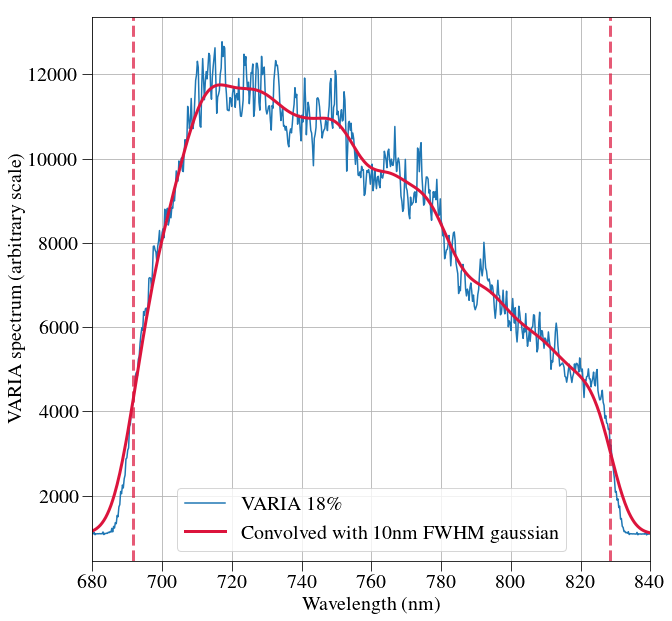

In [31]:
from scipy import ndimage
fname = '/Users/mrizzo/Downloads/nkt_691.6_828.4.ProcSpec'
dat = np.loadtxt(fname,skiprows=18)
plt.figure(figsize=(10,10))
plt.plot(dat[:,0],dat[:,1],label='VARIA 18\%')
smoothdata = ndimage.filters.gaussian_filter1d(
        dat[:,1], 10./0.26/2.35, order=0, mode='nearest')
plt.plot(dat[:,0],smoothdata,lw=3,color='crimson',label='Convolved with 10nm FWHM gaussian')
plt.axvline(760-760*0.09,color='crimson',lw=3,alpha=0.7,linestyle='--')
plt.axvline(760+760*0.09,color='crimson',lw=3,alpha=0.7,linestyle='--')

plt.xlim([680,840])
plt.xlabel('Wavelength (nm)')
plt.ylabel('VARIA spectrum (arbitrary scale)')
plt.grid('on')
plt.legend()
plt.savefig('/Users/mrizzo/Downloads/VARIA.pdf',dpi=300)


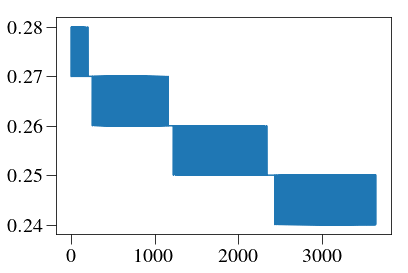

In [20]:
plt.plot(dat[1:,0]-dat[:-1,0])

crispy - INFO - Read data from HDU 0 of /Users/mrizzo/Downloads/det691.60_828.40_dmflat_spin.fits
crispy - INFO - Mean, median, std: (8353.361519043767, 6577.0, 4875.405420724526)
crispy - INFO - Reduced cube will have 25 wavelength bins
crispy - INFO - Elapsed time: 2.469949s
crispy - INFO - Reduced cube will have 25 wavelength bins


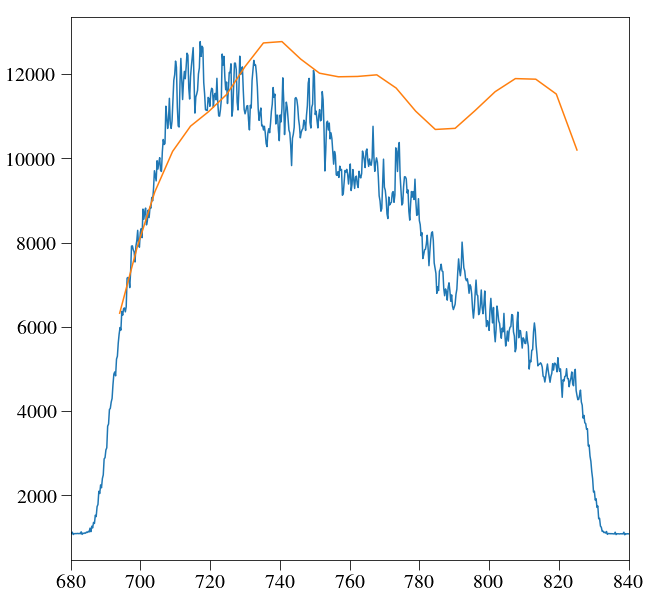

In [15]:
fname = '/Users/mrizzo/Downloads/det691.60_828.40_dmflat_spin.fits'
from crispy.IFS import reduceIFSMap
from crispy.tools.reduction import calculateWaveList
cube = reduceIFSMap(par,fname,method='optext',smoothbad=False,medsub=False)
lam_midpts,lam_endpts = calculateWaveList(par,method='optext')
cross = np.nanmean(np.nanmean(cube.data,axis=2),axis=1)
plt.figure(figsize=(10,10))
plt.plot(dat[:,0],dat[:,1])
plt.xlim([680,840])
plt.plot(lam_midpts,cross*np.amax(dat[:,1])/np.amax(cross))

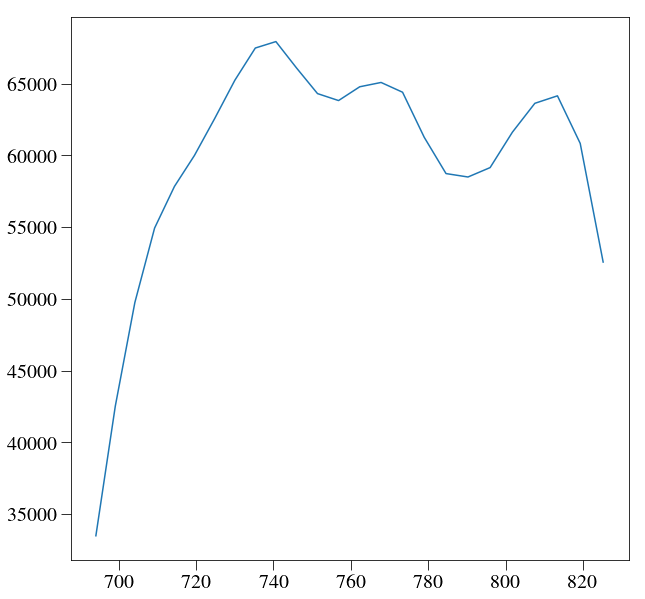

In [14]:
plt.figure(figsize=(10,10))
plt.plot(lam_midpts,cross)

# Calibration update

In [78]:
from crispy.tools.wavecal import monochromatic_update
from crispy.tools.wavecal import buildcalibrations
from crispy.tools.image import Image
# new image
# inImage = Image('/Users/mrizzo/Downloads/det760.0_760.0_20190205T1228.fits')
# wavelength at which new image was taken
# inLam=760.

inImage = Image(par.wavecalDir+'det759.9.fits')
# inImage = Image('/Users/mrizzo/Downloads/det814.7_814.7_20190205T1233.fits')
# wavelength at which new image was taken
inLam=759.9 


flist = os.listdir(par.wavecalDir)
wavs = []
for f in flist:
    if 'det' in f:
        tmp = f.split('.fits')[0]
        tmp = float(tmp.split('det')[-1])
        wavs.append(tmp)
wavs.sort()
par.lamlist = wavs
par.filelist = [par.wavecalDir+'det'+str(wav)+'.fits' for wav in par.lamlist]

# this adjusts the wavecal
monochromatic_update(par,inImage,inLam,apodize=False)
# but you still have to re-run buildcalibrations each time
par.gaussian_hires=False # since par.gaussian_hires is False, it will attempt to make high-resolution PSFLets
buildcalibrations(par,
                    inspect=True,
                    inspect_first=True,
                    genwavelengthsol=False, # Compute wavelength at the center of all pixels
                    makehiresPSFlets=False, # this requires very high SNR on the monochromatic frames
                    makePolychrome=False,   # This is needed to use least squares extraction
                    makePSFWidths=True,    # Fit PSF widths from high-res PSFLet models
                    upsample=3,            # upsampling factor of the high-resolution PSFLets
                    nsubarr=4,             # the detector is divided into nsubarr^2 regions for PSFLet averaging
                    apodize=False,         # to match PSFlet spot locations, only use the inner circular part of the 
                                           # detector, hence discarding the corners of the detector where lenslets are 
                                           # distorted
                    finecal=True,          # Attempt at doing fine wavelength calibration (need high SNR!)
                    trimfrac=0.0,
                    parallel=True,
                    readImgs=False         # don't read through all the images since we don't need to
                  ) 

crispy - INFO - Read data from HDU 0 of ..//ReferenceFiles/Calibra_20190128/det759.9.fits
crispy - INFO - Making copies of wavelength solution from ..//ReferenceFiles/Calibra_20190128//lamsol.dat
crispy - INFO - Generating new wavelength solution
crispy - INFO - Initializing transformation coefficients with previous values
crispy - INFO - Performing final optimization of PSFlet location transformation coefficients for frame ..//ReferenceFiles/Calibra_20190128/det759.9.fits
crispy - INFO - Array origin: (540.1653466846176, 511.9055919951667)
crispy - INFO - 0.02: x-shift from archival spot positions (pixels)
crispy - INFO - 0.01: y-shift from archival spot positions (pixels)
crispy - INFO - -0.00: rotation from archival spot positions (degrees)
crispy - INFO - Overwriting old wavecal
crispy - INFO - Don't forget to run buildcalibrations again with makePolychrome=True!
crispy - INFO - Building calibration files, placing results in ..//ReferenceFiles/Calibra_20190128/
crispy - INFO - Read

In [27]:
from crispy.tools.locate_psflets import locatePSFlets, PSFLets
inImage = Image('/Users/mrizzo/Downloads/det760.0_760.0_20190205T1228.fits')

# inImage = Image('/Users/mrizzo/Downloads/det814.7_814.7_20190205T1233.fits')

inLam=760.0
# inImage = Image(par.wavecalDir+'det759.9.fits')
# inLam=759.9 

lamsol = np.loadtxt(os.path.join(par.wavecalDir, "lamsol.dat"))
lam = lamsol[:, 0]
allcoef = lamsol[:, 1:]
psftool = PSFLets()
oldcoef = psftool.monochrome_coef(inLam, lam, allcoef, order=3)

log.info('Generating new wavelength solution')
ysize, xsize = inImage.data.shape
mask = np.ones((ysize, xsize))
apodize=True
order=3
if apodize:
    y = np.arange(ysize)
    x = np.arange(xsize)
    x -= xsize // 2
    y -= ysize // 2
    x, y = np.meshgrid(x, y)

    r = np.sqrt(x**2 + y**2)
    mask = (r < xsize//3)
trimfrac=0.0
x, y, good, newcoef = locatePSFlets(inImage, polyorder=order, 
                                    mask=mask, 
                                    sig=1., 
                                    coef=oldcoef, 
                                    phi=par.philens, 
                                    scale=par.pitch / par.pixsize,
                                    nlens=par.nlens,
                                    finesearch=10,
                                    trimfrac=trimfrac)
# psftool.geninterparray(lam, allcoef, order=order)
dcoef = newcoef - oldcoef


crispy - INFO - Read data from HDU 0 of /Users/mrizzo/Downloads/det760.0_760.0_20190205T1228.fits
crispy - INFO - Generating new wavelength solution
crispy - INFO - Initializing transformation coefficients with previous values
crispy - INFO - Performing final optimization of PSFlet location transformation coefficients for frame /Users/mrizzo/Downloads/det760.0_760.0_20190205T1228.fits
crispy - INFO - Array origin: (721.5123639896312, 509.90907305907064)


In [25]:
print oldcoef
print dcoef
print lam

[ 5.49733981e+02  1.21689876e+01 -8.18822194e-03  1.03154511e-04
 -6.02246266e+00  1.04389229e-03 -4.37619537e-05 -6.13617854e-03
  1.04748109e-04 -5.16664352e-05  5.11987398e+02  5.85570059e+00
 -6.45926697e-04  4.84740416e-05  1.16708286e+01 -5.02958764e-04
  9.56928542e-05 -1.40707445e-03  4.65493034e-05  9.40777947e-05]
[-1.42131461e+02 -2.78055910e+00  8.24250923e-02 -3.93347152e-03
  6.84104436e+00 -3.83308377e-03 -6.55283809e-04 -5.54079750e-03
 -1.80340811e-04  2.91729605e-07 -1.99411202e+00 -7.33579503e-01
  2.08864969e-03  1.21937379e-05 -1.08797231e+01  7.64178685e-03
  1.17568299e-05 -4.80467057e-03 -3.00981710e-03  3.60392095e-05]
[691.6 696.2 700.7 705.3 709.8 714.4 718.9 723.5 728.  732.6 737.1 741.7
 746.2 750.8 755.3 759.9 764.5 769.  773.6 778.1 782.7 787.2 791.8 796.3
 800.9 805.4 810.  814.5 819.1 823.6 828.2]


In [15]:
from crispy.tools.wavecal import do_inspection
do_inspection(par, inImage.data, x, y, inLam)

## Extract broadband flat

In [23]:
fname = '/Users/mrizzo/Downloads/det691.60_828.40_20190205T1223.fits'
from crispy.IFS import reduceIFSMap
from crispy.tools.reduction import calculateWaveList
from astropy.stats import sigma_clipped_stats
from crispy.tools.image import Image
im = Image(fname)
mean, median, std = sigma_clipped_stats(im.data, sigma=3.0, iters=5)
cube = reduceIFSMap(par,fname,method='optext',smoothbad=False,medsub=True)


crispy - INFO - Read data from HDU 0 of /Users/mrizzo/Downloads/det691.60_828.40_20190205T1223.fits
crispy - INFO - Read data from HDU 0 of /Users/mrizzo/Downloads/det691.60_828.40_20190205T1223.fits
crispy - INFO - Mean, median, std: (8699.894333059476, 7007.0, 5110.228778206734)
crispy - INFO - Subtracting median from image
crispy - INFO - Reduced cube will have 25 wavelength bins
crispy - INFO - Elapsed time: 2.709626s


In [14]:
from crispy.tools.imgtools import gen_lenslet_flat
lenslet_flat,lenslet_mask = gen_lenslet_flat(cube)


('Mean, sig in central 20 lenslets:', 831048.8580164214, 135350.41364445252)


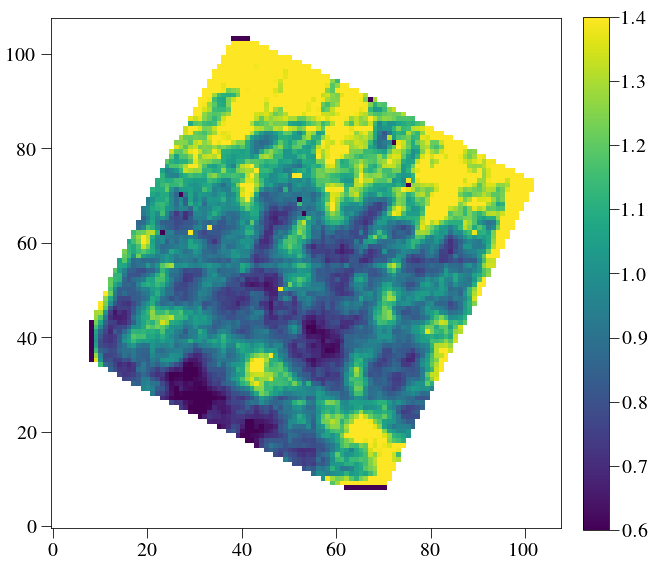

In [18]:
from crispy.tools.imgtools import gen_lenslet_flat
# lenslet_flat,lenslet_mask = gen_lenslet_flat(BBcube)
# Image(data = lenslet_flat).write(par.exportDir+"/lenslet_flat.fits",clobber=True)
# Image(data = lenslet_mask).write(par.exportDir+"/lenslet_mask.fits",clobber=True)
plt.figure(figsize=(10,10))
plt.imshow(lenslet_flat*lenslet_mask, cmap='viridis',vmin=0.6,vmax=1.4)
plt.colorbar(fraction=0.046, pad=0.04)
plt.savefig('/Users/mrizzo/Downloads/Newflat.png')


# Use flight algorithm

In [69]:
lam=[760.0]
xpos = []
ypos = []
good = []
ylistarr = fits.getdata(par.wavecalDir + 'dylistarr.fits')
xlistarr = fits.getdata(par.wavecalDir + 'dxlistarr.fits')
snrlistarr = fits.getdata(par.wavecalDir + 'snrlistarr.fits')


finexy = [np.nanmean(xlistarr,axis=0),np.nanmean(ylistarr,axis=0),np.amin(snrlistarr,axis=0)]

xindx = np.arange(-par.nlens / 2, par.nlens / 2)
xindx, yindx = np.meshgrid(xindx, xindx)

_x, _y = psftool.return_locations(
    lam, allcoef, xindx, yindx)
_x += finexy[0]
_y += finexy[1]
_good = (_x > 5) * (_x < xsize - 5) * \
        (_y > 5) * (_y < ysize - 5)
xpos += [_x]
ypos += [_y]
good += [_good]

log.info('Saving wavelength calibration cube')
outkey = fits.HDUList(fits.PrimaryHDU(lam))
outkey.append(fits.PrimaryHDU(np.asarray(_x)))
outkey.append(fits.PrimaryHDU(np.asarray(_y)))
outkey.append(fits.PrimaryHDU(np.asarray(_good).astype(np.uint8)))
outkey.writeto('/Users/mrizzo/Downloads/monochromekey.fits', clobber=True)
print np.asarray(_x).shape
fname = par.wavecalDir+'polychromekeyR70.fits'
polychrome = fits.open(fname)
print polychrome[3].data.shape

crispy - INFO - Saving wavelength calibration cube
(108, 108)
(25, 108, 108)


In [52]:
slicenum=13
fname = par.wavecalDir+'polychromekeyR70.fits'
polychrome = fits.open(fname)
outkey = fits.HDUList(fits.PrimaryHDU(np.asarray([polychrome[0].data[slicenum]])))
outkey.append(fits.PrimaryHDU(np.asarray(polychrome[1].data[slicenum])))
outkey.append(fits.PrimaryHDU(np.asarray(polychrome[2].data[slicenum])))
outkey.append(fits.PrimaryHDU(np.asarray(polychrome[3].data[slicenum])))
outkey.writeto('/Users/mrizzo/Downloads/monochromekey_old.fits', overwrite=True)
monochrome = fits.open('/Users/mrizzo/Downloads/monochromekey_old.fits')
print monochrome[3].data.shape

(108, 108)


In [36]:
# this is extremely lean version of the IFS Horne extraction software, with only the bare
# minimum needed
# This relies completely on appropriate calibration files built on the ground using crispy

import numpy as np
from astropy.io import fits
from scipy import interpolate

def extract1D(  image,
                lamlist,
                calib_file,
                sum=False,
                delt_y=5
                ):
    '''
    Performs 1D Horne spectral extraction if sum=False, or simply the 1D sum if sum=True.
    
    Parameters
    ----------
    image: 2D array of floats
        Represents the cleaned IFS detector image.
    lamlist: 1D array of desired wavelengths
        Outputs data onto desired wavelength grid. Values are in nanometer
    calib_file: calibration data structure file path
        Fits file that contains all necessary calibration for extraction, 
        including the mapping between pixels and wavelengths, etc. 
        This file can be created by the crispy main software.
    sum: boolean
        If True, this represents a 1D sum in the cross-spectral direction
        If False, this fits a 1D Gaussian in the cross-spectral direction
    dy: int
        Determines the width of the microspectrum in the cross-spectral direction
        
    Returns
    -------
    cube: 3D array of floats
        This is the exctracted IFS datacube
    
    7/19/18:
    @TODO: Add dimensions to all arrays or write memo describing all of that
    @TODO: define what gets hardcoded and not
    
    '''
    
    # number of lenslets (hardcoded for now)
    nlens=108
    
    # load calibration file
    calib = fits.open(calib_file)
    
    # wavelength corresponding to each center pixel for each location along the spectral
    # direction
    lam_indx = calib[0].data
    
    # x & y pixel locations of each psflet for each wavelength
    # nominally this is evaluated at the center of the pixels across the dispersion
    # direction
    xindx = calib[1].data
    yindx = calib[2].data
    
    # array of number of wavelengths for each microspectrum
    # for example, towards the edges of the detector there will be less wavelengths
    # per microspectrum since some of them fall outside the detector 
    nlam = calib[3].data.astype(int)
    
    # Number of maximum wavelengths across the spectral dimension across the entire field
    Nmax = np.amax(nlam)

    # boolean mask for good vs bad psflets
    good = calib[4].data.astype(int)
    
    # standard deviation of the gaussian fits (same size as xindx and yindx)
    sig = calib[5].data
    
    # define arrays of indices to extract the data from the detector
    x = np.arange(image.shape[1])
    y = np.arange(image.shape[0])
    x, y = np.meshgrid(x, y)
    
    # allocate space for results
    coefs = np.zeros(tuple([max(Nmax, len(lamlist))] + list(yindx.shape)[:-1]))
    cube = np.zeros((len(lamlist), nlens, nlens))
    xarr, yarr = np.meshgrid(np.arange(Nmax), np.arange(delt_y))
    print xarr.shape,yarr.shape

    # This is the main loop over all lenslets
    for i in range(xindx.shape[0]):
        for j in range(yindx.shape[1]):
            # only do this for a good lenslet that hasn't been flagged
            if good[i, j]:
                # load the values for this microspectrum
                _x = xindx[i, j, :nlam[i, j]]
                _y = yindx[i, j, :nlam[i, j]]
                _sig = sig[i, j, :nlam[i, j]]
                _lam = lam_indx[i, j, :nlam[i, j]]
                # this needs to be done just to get rid of unintended NaNs
                iy = np.nanmean(_y)
                
                if ~np.isnan(iy):
                    # find the index of the bottom line of the microspectrum
                    i1 = int(iy - delt_y / 2.)+1
                    
                    # this constructs a 2D array of pixel distances from the 
                    # center line of the microspectrum
                    dy = _y[xarr[:,:len(_lam)]] - y[i1:i1 + delt_y,int(_x[0]):int(_x[-1]) + 1]
                    
                    # now extract the microspectrum from the image
                    data = image[i1:i1 + delt_y, int(_x[0]):int(_x[-1]) + 1]

                    # if the mode is simple sum, we will not need any weights
                    if sum: weight = 1.
                    else:
                        weight = np.exp(-dy**2 / _sig**2)
                        # normalize weights for each microspectrum column
                        weight /= np.sum(weight,axis=0)[np.newaxis,:]
                    
                    # sum along the cross-spectral direction
                    coefs[:len(_lam), i, j] = np.sum(weight * data, axis=0)
                
                    # normalize if not doing the sum
                    if ~sum:
                        coefs[:len(_lam), i, j] /= np.sum(weight**2, axis=0)
                
                    # now we want to interpolate onto the desired wavelength grid
                    # for this we use a third-order spline interpolation, but we could
                    # test much simpler methods for 1D interpolation
                    # also, if grid is unique, might be able to hard code some of the
                    # interpolation steps to save flops
                    # place results in the cube placeholder
                    tck = interpolate.splrep(_lam, coefs[:len(_lam), i, j], s=0, k=3)
                    cube[:, j, i] = interpolate.splev(lamlist, tck, ext=1)
                else:
                    cube[:, j, i] = np.NaN
            else:
                cube[:, j, i] = np.NaN
                
    # It is possible that an extra flatfielding step will be wanted. If this is desired
    # in this function, then it would be:
    # cube *= flatfield
    # A similar expression would hold for further masking or smoothing or whatever.
    # Of course, a flatfield and/or a mask would need to be supplied to the function.
    
    return cube


In [38]:
fname = '/Users/mrizzo/Downloads/det691.60_828.40_20190205T1223.fits'
img = fits.getdata(fname)
from crispy.tools.reduction import calculateWaveList
lam_midpts,lam_endpts = calculateWaveList(par,method='optext')
cube = extract1D(img,lam_midpts,par.wavecalDir+'calib.fits')


crispy - INFO - Reduced cube will have 25 wavelength bins
(5, 28) (5, 28)


In [39]:
fits.writeto('/Users/mrizzo/Downloads/out.fits',cube,overwrite=True)

# update

In [40]:
import numpy as np
from astropy.io import fits
from scipy import interpolate

def centroid(img):
    '''
    Very simple centroiding function implemented manually
    
    Parameters
    ----------
    img: 2d array
        Image to centroid
        Image can be masked with masked values equal to np.NaN
        
    Returns
    -------
    sx, sy: floats
        centroid coordinates in pixels
    '''
    lx,ly = img.shape
    xgrid = np.arange(lx)
    ygrid = np.arange(ly)
    xgrid,ygrid = np.meshgrid(xgrid, ygrid)
    s = np.nansum(img)
    if np.nonzero(s):
        sx = np.nansum(xgrid * img) / s
        sy = np.nansum(ygrid * img) / s
    else:
        sx = np.NaN
        sy = np.NaN
    return sx,sy
    

def update( data,
            monochromekey_file,
            halfsize=5,
            apdiam=3,
            snrthreshold=10
            ):
    '''
    Determines dx, dy offsets for all lenslets
    global offset is the nanmean of these arrays
    
    Parameters
    ----------
    data: 2d array
        New clean monochromatic data with high SNR psflets
    monochromekey: calibration structure instance for single wavelength
        Contains x, y positions of all lenslets for given wavelength
        Also contains lenslet mask "good"
    halfsize: int
        Half size of search area in pixels
    apdiam: int
        Aperture diameter for photometry
    snrthreshold: int
        Threshold for which psflet centroids will be discarded
    '''
    
    monochromekey = fits.open(monochromekey_file)
    
    # load positions and mask
    x = monochromekey[1].data
    y = monochromekey[2].data
    good = monochromekey[3].data

    # calculate data median and allocate space
    median = np.median(data)
    ysize, xsize = data.shape
    dy = np.zeros_like(x)
    dx = np.zeros_like(x)
    snr = np.zeros_like(x)
    
    # calculate arrays that are useful
    mgrid = np.arange(2*halfsize)
    xgrid,ygrid = np.meshgrid(mgrid,mgrid)
    
    # run centroid routine for all psflets
    for j in range(x.shape[0]):
        for k in range(x.shape[1]):
            if good[j,k]:
                xl = x[j,k]
                yl = y[j,k]
                # define bottom left coordinates of cutout
                xmin = int(xl-halfsize)+1
                ymin = int(yl-halfsize)+1
                
                # ensure cutout is within image
                if ymin>0 and xmin>0 and xmin+2*halfsize<xsize and ymin+2*halfsize<ysize:
                    # define cutout
                    cutout = data[ymin:ymin + 2*halfsize,xmin:xmin + 2*halfsize] - median

                    # here is the new centroiding function: we could change this to something more robust
                    dx[j,k], dy[j,k] = centroid(cutout)

                    # mask used for elementary aperture photometry
                    apmask = (xgrid-dx[j,k])**2 + (ygrid-dy[j,k])**2 < apdiam**2
                    apval = np.nansum(apmask * cutout)

                    # estimate of SNR, only valid for very high fluxes, could do better
                    snr[j,k] = np.abs(apval) / np.sqrt(np.abs(apval) + median)
                    
                    # apply threshold
                    if snr[j,k] < snrthreshold:
                        dy[j,k] = np.NaN
                        dx[j,k] = np.NaN
                    else:
                        dy[j,k] -= y[j,k] - ymin
                        dx[j,k] -= x[j,k] - xmin
            else:
                snr[j,k] = np.NaN
                dy[j,k] = np.NaN
                dx[j,k] = np.NaN
        
    return dx,dy,snr

In [61]:
fname = '/Users/mrizzo/Downloads/det760.0_760.0_20190205T1228.fits'
data = fits.getdata(fname)
monochromekey_file = '/Users/mrizzo/Downloads/monochromekey.fits'
dx,dy,snr = update(data,monochromekey_file)

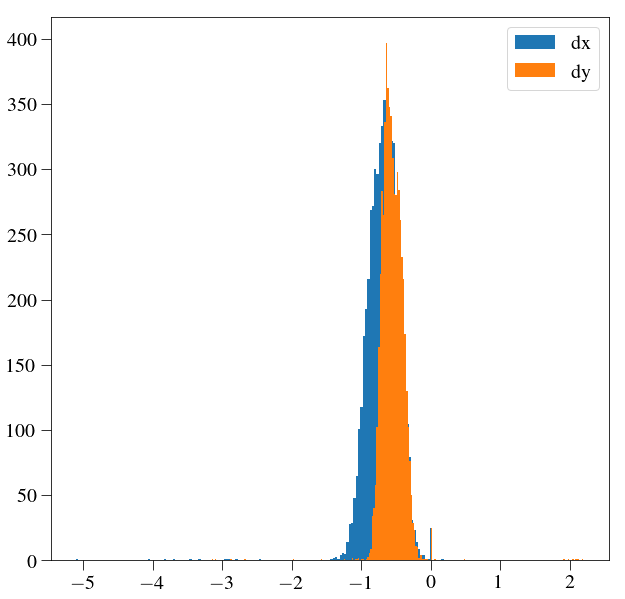

In [62]:
def histograms(dx,dy):
    plt.figure(figsize=(10,10))
    plt.hist(dx[~np.isnan(dx)], bins='auto',label='dx') 
    plt.hist(dy[~np.isnan(dy)], bins='auto',label='dy') 
    plt.legend()
histograms(dx,dy)

In [63]:
Dx = np.nanmean(dx)
Dy = np.nanmean(dy)
print Dx,Dy

-0.6849023428616343 -0.5535707842785309


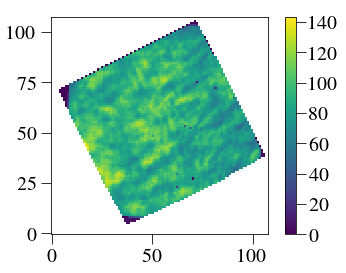

In [57]:
plt.imshow(snr)
plt.colorbar()

In [65]:
def apply_update(   dx,
                    dy,
                    snr,
                    old_monochromekey_file,
                    old_calib_file,
                    new_monochromekey_file,
                    new_calib_file,
                    fitrot = True
                    ):
    
    # if we don't fit the rotation, then it's a simple mean offset
    if not fitrot:
        Dx = np.nanmean(dx)
        Dy = np.nanmean(dy)
        # update the monochrome
        hdul = fits.open(old_monochromekey_file)
        hdul[1].data += Dx
        hdul[2].data += Dy
            # probably want to write something here in the header
        hdul.writeto(new_monochromekey_file)
        hdul.close()
        print "Created %s" % new_monochromekey_file
        
        # update the calibration file
        hdul = fits.open(old_calib_file)
        # for cross-dispersion axis, this is quite trivial 
        # (assuming microspectra are nice and aligned)
        # for dispersion axis it is a bit more complicated because
        # we need to re-interpolate the grid if the shift is not an integer pixel
        xindx = hdul[1].data.copy()
        nlam = hdul[3].data.astype(int)
        lams = hdul[0].data.copy()
        good = hdul[4].data
        for ix in range(xindx.shape[0]):
            for iy in range(xindx.shape[1]):
                if good[ix,iy]:
                    tck_y = interpolate.splrep(xindx[ix,iy,:nlam[ix,iy]], lams[ix,iy,:nlam[ix,iy]], k=1, s=0)
                    dDx = Dx - np.int(Dx)
                    hdul[0].data[ix,iy,:nlam[ix,iy]] = interpolate.splev(xindx[ix,iy,:nlam[ix,iy]]+dDx, tck_y)
                    hdul[1].data[ix,iy,:nlam[ix,iy]] += np.int(Dx)
                    hdul[2].data[ix,iy,:nlam[ix,iy]] += Dy
                    
        hdul.writeto(new_calib_file)
        hdul.close()
        print "Created %s" % new_calib_file
            
        # calculate standard deviations
        sigx = np.nanstd(dx)/np.sqrt(np.sum(~np.isnan(dx)))
        sigy = np.nanstd(dy)/np.sqrt(np.sum(~np.isnan(dy)))
        
#         export offsets and stddev
        return Dx,Dy,sigx,sigy

    # if we need to fit the rotation, then we need a bit more work
    else:
        hdul = fits.open(old_monochromekey_file)    
        # load positions and mask
        x = hdul[1].data.copy()
        y = hdul[2].data.copy()
        good = hdul[3].data.copy()
        
        # form the clouds of points before and after update
        old = []
        new = []
        
        # need to know the approximate center of rotation for better accuracy
        xc = x[x.shape[0]//2,x.shape[1]//2]
        yc = y[y.shape[0]//2,y.shape[1]//2]
        
        # put point coordinates in the lists
        for j in range(x.shape[0]):
            for k in range(x.shape[1]):
                if good[j,k] and ~np.isnan(x[j,k]) and ~np.isnan(y[j,k]) and ~np.isnan(dx[j,k]) and ~np.isnan(dy[j,k]):
                    old.append([x[j,k] - xc,y[j,k] - yc])
                    new.append([x[j,k] + dx[j,k] - xc,y[j,k] + dy[j,k] - yc])

        # put them in matrix format to represent a translation and a rotation
        # about the center of the detector
        A_data = []
        for pt in old:
            A_data.append( [-pt[1], pt[0], 1, 0] )
            A_data.append( [ pt[0], pt[1], 0, 1] )

        b_data = []
        for pt in new:
            b_data.append(pt[0])
            b_data.append(pt[1])

        # Solve via least squares (svd also possible if preferred)
        # Solving Ax=b
        A = np.matrix( A_data )
        b = np.matrix( b_data ).T
        results,residuals,rank,sv = np.linalg.lstsq(A, b)
        s,c,tx,ty = np.array(results.T)[0]
        print('s,c,tx,ty:',s,c,tx,ty)

        # record the actual dx, dy that was applied to all lenslets
        Dx = c*(x-xc) - s*(y-yc) + tx + xc - x
        Dy = c*(y-yc) + s*(x-xc) + ty + yc - y
        
        # apply Dx, Dy
        hdul[1].data += Dx
        hdul[2].data += Dy
        
        hdul[0].header['comment'] = 'Previous file: '+old_monochromekey_file
        hdul[0].header['comment'] = 's,c,tx,ty:'+str(s)+str(c)+str(tx)+str(ty)
        
        # calculate standard deviations
        sigx = np.nanstd(Dx)/np.sqrt(np.sum(~np.isnan(Dx)))
        sigy = np.nanstd(Dy)/np.sqrt(np.sum(~np.isnan(Dy)))
        
        # @TODO: need to mask some dots due to rotation?
                    
        # here update some headers and push the updates
        hdul.writeto(new_monochromekey_file)
        hdul.close()
        print "Created %s" % new_monochromekey_file

        # update the calibration file
        hdul = fits.open(old_calib_file)
        # for cross-dispersion axis, this is quite trivial 
        # (assuming microspectra are nice and aligned)
        # for dispersion axis it is a bit more complicated because
        # we need to re-interpolate the grid if the shift is not an integer pixel
        xindx = hdul[1].data.copy()
        nlam = hdul[3].data.astype(int)
        lams = hdul[0].data.copy()
        good = hdul[4].data
        for ix in range(xindx.shape[0]):
            for iy in range(xindx.shape[1]):
                if good[ix,iy]:
                    tck_y = interpolate.splrep(xindx[ix,iy,:nlam[ix,iy]], lams[ix,iy,:nlam[ix,iy]], k=1, s=0)
                    iDx = np.int(Dx[ix,iy])
                    dDx = Dx[ix,iy] - iDx
                    hdul[0].data[ix,iy,:nlam[ix,iy]] = interpolate.splev(xindx[ix,iy,:nlam[ix,iy]]+dDx, tck_y)
                    hdul[1].data[ix,iy,:nlam[ix,iy]] += iDx
                    hdul[2].data[ix,iy,:nlam[ix,iy]] += Dy[ix,iy]
        
        hdul.writeto(new_calib_file)
        hdul.close()
        print "Created %s" % new_calib_file

    
        return Dx,Dy,sigx,sigy
            # rotation matrix coeffs and translation vector
#             return s,c,tx,ty
        

In [66]:
import time
tstring = time.strftime("%Y%m%d-%H%M%S")
newmono = '/Users/mrizzo/Downloads/monochromekey_'+tstring+'.fits'
newcalib = '/Users/mrizzo/Downloads/newcalib_'+tstring+'.fits'

Dx,Dy,sigx,sigy = apply_update(dx,#-1.1*np.ones_like(dx,dtype=np.float),
                               dy,#0.0*np.ones_like(dy,dtype=np.float),
                               snr,
                               '/Users/mrizzo/Downloads/monochromekey.fits',
                               '/Users/mrizzo/Downloads/calib.fits',
                               newmono,
                               newcalib,
                               fitrot=True)

('s,c,tx,ty:', 0.0001294862242500301, 1.0004838502612803, -0.6811801238141308, -0.5572994308304015)
Created /Users/mrizzo/Downloads/monochromekey_20190205-221856.fits
Created /Users/mrizzo/Downloads/newcalib_20190205-221856.fits


In [68]:
cube = extract1D(img,lam_midpts,newcalib)
fits.writeto('/Users/mrizzo/Downloads/out_after_calib.fits',cube,overwrite=True)

(5, 28) (5, 28)


# PISCES data analysis

## Feb 11th, 2019

In [2]:
os.chdir('/Users/mrizzo/IFS/crispy-flight')
import numpy as np
from astropy.io import fits
from extract import extract1D
from update import update, apply_update
# these are the calibration files when you want to extract
old_mono = 'files/monochromekey_original.fits'
old_calib = 'files/calib_original.fits'
lam_midpts = np.arange(695.,826.,10.)

In [74]:
BB_before_cal = 'PISCES_Files/det691.6_828.4_20190211T1555.fits'
lam_midpts = np.arange(695.,826.,10.)
cube = extract1D(img,lam_midpts,old_calib)
fits.writeto('Out/out.fits',cube,overwrite=True)


(5, 28) (5, 28)


In [84]:
import matplotlib as mpl
def do_inspection(image, xpos, ypos, name):

    xg, yg = xpos.shape
    vals = np.array([(xpos[m, n], ypos[m, n])
                     for m in range(xg) for n in range(yg)])
    pos = (vals[:, 0], vals[:, 1])
    #aps = CircularAperture(pos, r=3)
    fig, ax = plt.subplots(figsize=(15, 15))
    mean = np.mean(image)
    std = np.std(image)
    norm = mpl.colors.Normalize(vmin=mean, vmax=mean + 5 * std)
    ax.imshow(
        image,
        cmap='Greys',
        norm=norm,
        interpolation='nearest',
        origin='lower')
    for val in vals:
        circle = plt.Circle(val, 3, color='blue', lw=1, alpha=0.5)
        ax.add_artist(circle)
    #aps.plot(ax=ax,color='blue', lw=1, alpha=0.5)
    fig.savefig('Out/inspection_%s.png' % (name), dpi=300)
    plt.close(fig)


In [85]:
monochromekey = fits.open(old_mono)
new_mono = 'PISCES_Files/monochromekey760_20190211T1556.fits'
monochromekey = fits.open(new_mono)
# load positions and mask
x = monochromekey[1].data
y = monochromekey[2].data

upd = fits.getdata('PISCES_Files/det760.0_760.0_20190211T1556.fits')

do_inspection(upd,x,y,'new')

In [115]:
import matplotlib as mpl
def inspect_update(old_mono,
                   update_image,
                   new_mono,
                   outname=None,outdir=''):
    
    fig, ax = plt.subplots(figsize=(15, 15))
    image = fits.getdata(update_image)
    # start by displaying grayscale image in the background
    mean = np.mean(image)
    std = np.std(image)
    norm = mpl.colors.Normalize(vmin=mean, vmax=mean + 5 * std)
    ax.imshow(
        image,
        cmap='Greys',
        norm=norm,
        interpolation='nearest',
        origin='lower')
    
    # open new monochrome and display positions as red circles
    monochromekey = fits.open(new_mono)
    xpos = monochromekey[1].data
    ypos = monochromekey[2].data
    marker = '+'
    plt.plot(xpos.flatten(),ypos.flatten(),marker=marker,linestyle='None',color='crimson',alpha=0.5, label='New wavelength solution')
    
    # open old monochrome and display positions as blue crosses
    monochromekey = fits.open(old_mono)
    xpos = monochromekey[1].data
    ypos = monochromekey[2].data
    marker = 'x'
    plt.plot(xpos.flatten(),ypos.flatten(),marker=marker,linestyle='None',alpha=0.3, label='Old wavelength solution')
    plt.xlim([0,image.shape[0]])
    plt.ylim([0,image.shape[1]])
    plt.legend(fontsize=20)
    if outname is None: 
        if '/' in update_image:
            name = update_image.split('/')[-1].split('.fits')[0]
    else: name = outname
    print(name)
    fig.savefig('Out/inspect_update_%s.pdf' % (name), dpi=100)
    fig.savefig('Out/inspect_update_%s.png' % (name), dpi=300)
    plt.close(fig)

In [116]:
old_mono = 'files/monochromekey_original.fits'
update_image = 'PISCES_Files/det760.0_760.0_20190211T1556.fits'
new_mono = 'PISCES_Files/monochromekey760_20190211T1556.fits'
inspect_update(old_mono,
                   update_image,
                   new_mono)

det760.0_760.0_20190211T1556


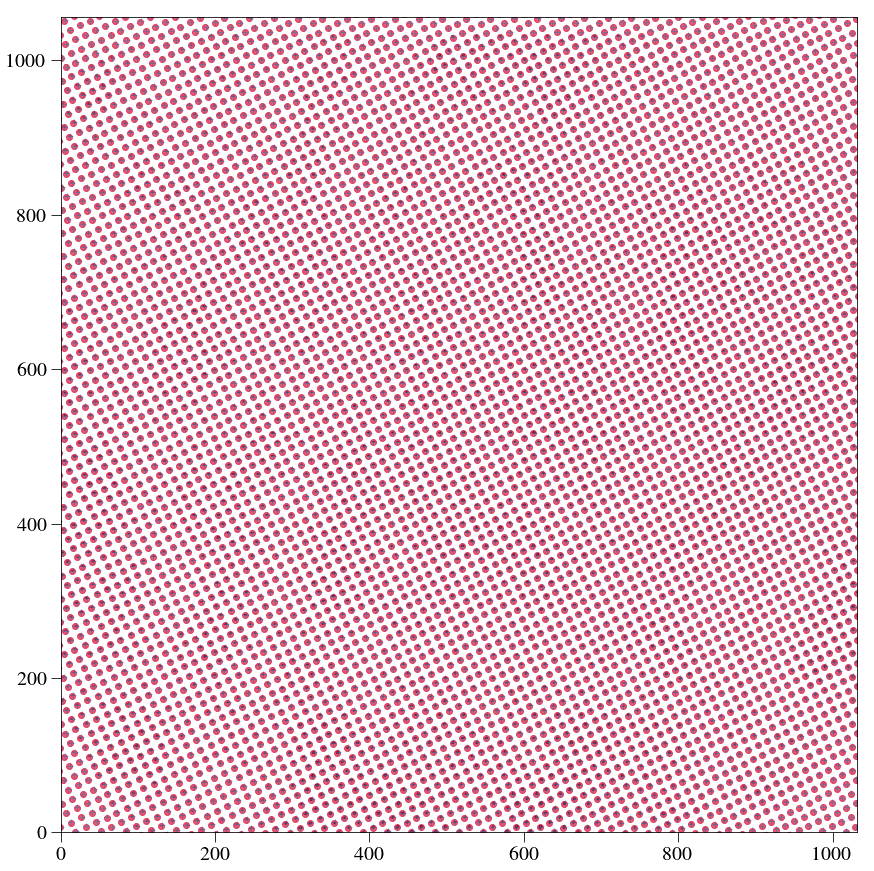

In [98]:
fig, ax = plt.subplots(figsize=(15, 15))
image = fits.getdata('PISCES_Files/det760.0_760.0_20190211T1556.fits')
mean = np.mean(image)
std = np.std(image)
norm = mpl.colors.Normalize(vmin=mean, vmax=mean + 5 * std)
ax.imshow(
    image,
    cmap='Greys',
    norm=norm,
    interpolation='nearest',
    origin='lower')

# open old monochrome and display positions as circles
monochromekey = fits.open(new_mono)
xpos = monochromekey[1].data
ypos = monochromekey[2].data
xg, yg = xpos.shape
marker = 'o'
plt.plot(xpos.flatten(),ypos.flatten(),marker=marker,linestyle='None',color='crimson',alpha=0.7)
plt.xlim([0,image.shape[0]])
plt.ylim([0,image.shape[1]])
monochromekey = fits.open(old_mono)
xpos = monochromekey[1].data
ypos = monochromekey[2].data
xg, yg = xpos.shape
marker = '+'
plt.plot(xpos.flatten(),ypos.flatten(),marker=marker,linestyle='None',alpha=0.5)
plt.xlim([0,image.shape[0]])
plt.ylim([0,image.shape[1]])
fig.savefig('Out/inspection_%s.png' % ('test'), dpi=100)


In [3]:
image = fits.getdata('PISCES_Files/det760.0_760.0_20190211T1556.fits')
img760 = extract1D(image,lam_midpts,old_calib)
fits.writeto('Out/img760.fits',img760,overwrite=True)

(5, 28) (5, 28)


757.7699827055402


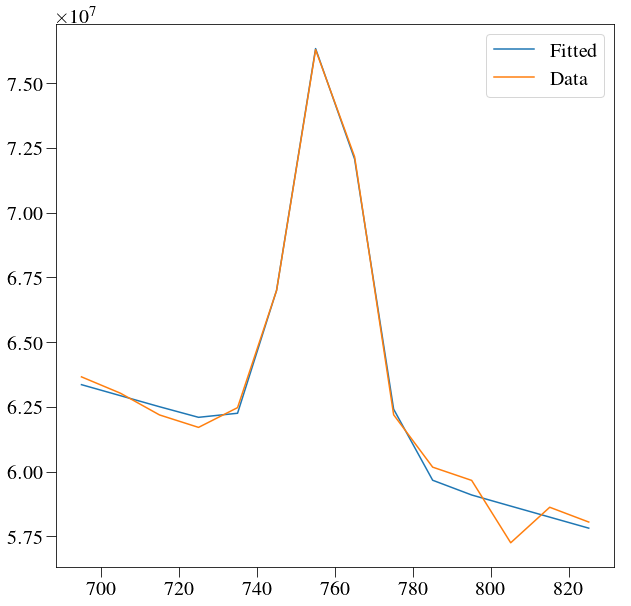

In [4]:
from unittests import plotfit
plotfit(img760,lam_midpts)

In [5]:
fname = 'PISCES_Files/det760.0_760.0_20190211T1556.fits'
# fname = 'PISCES_Files/det746.2.fits'
update_760 = fits.getdata(fname)
dx,dy,snr = update(update_760,old_mono)

#### Verify that values are not crazy large ####
Dx = np.nanmean(dx)
Dy = np.nanmean(dy)
print (Dx,Dy)

#### Apply update ####
# pick a name for new calib (for example, use the date/time for review)
# tstring = time.strftime("%Y%m%d-%H%M%S")
new_mono = 'files/monochromekey760_new.fits'
new_calib = 'files/calib_new.fits'
Dx,Dy,sigx,sigy = apply_update(dx,dy,snr,
                               old_mono,
                               old_calib,
                               new_mono,
                               new_calib,
                               fitrot=True)
                               
#### Cube extraction again ####
cube = extract1D(update_760,lam_midpts,new_calib)
fits.writeto('out_after_calib.fits',cube,overwrite=True)


(-0.6824858878531115, -0.6349350614953383)
('s,c,tx,ty:', 0.00014009168819920065, 1.0005065697550026, -0.6785426822020858, -0.638782941396191)
Created files/monochromekey760_new.fits
Created files/calib_new.fits
(5, 28) (5, 28)


(5, 28) (5, 28)
757.7699827055402


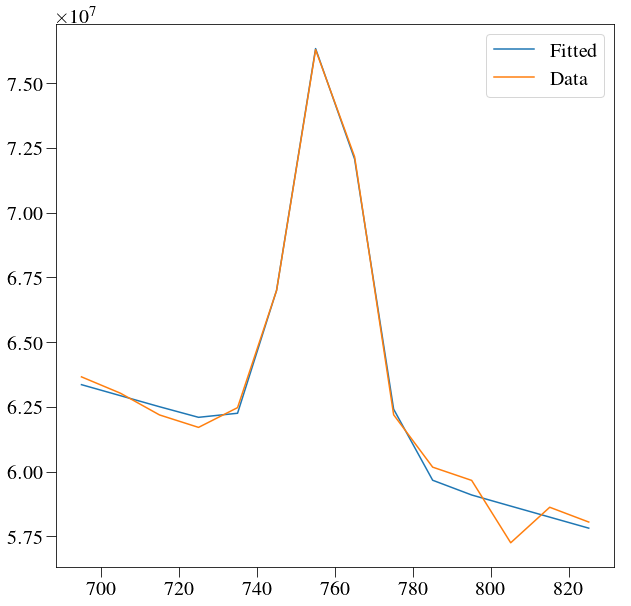

In [7]:
from unittests import plotfit
cube = extract1D(update_760,lam_midpts,old_calib)
fits.writeto('out_before_calib.fits',cube,overwrite=True)
plotfit(cube,lam_midpts)

(5, 28) (5, 28)
761.5018121591881
[[  695.         11642.11024933]
 [  705.         11520.60064596]
 [  715.         11372.70807988]
 [  725.         11278.80239877]
 [  735.         11319.96765517]
 [  745.         11825.874965  ]
 [  755.         13519.5825711 ]
 [  765.         14248.22218154]
 [  775.         11730.25830462]
 [  785.         11065.15888697]
 [  795.         10805.35825764]
 [  805.         10574.19701506]
 [  815.         10717.70139465]
 [  825.         10600.81404878]]


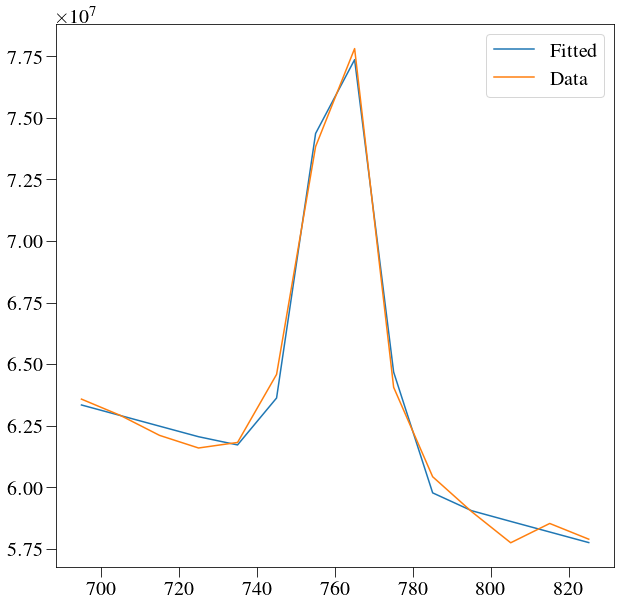

In [9]:
cube = extract1D(update_760,lam_midpts,new_calib)
plotfit(cube,lam_midpts)
print(np.array([lam_midpts,np.nanmean(cube,axis=(1,2))]).T)


In [10]:
from unittests import inspect_update
inspect_update(old_mono,
                   fname,
                   new_mono)

det760.0_760.0_20190211T1556


(5, 28) (5, 28)
767.8204415537186


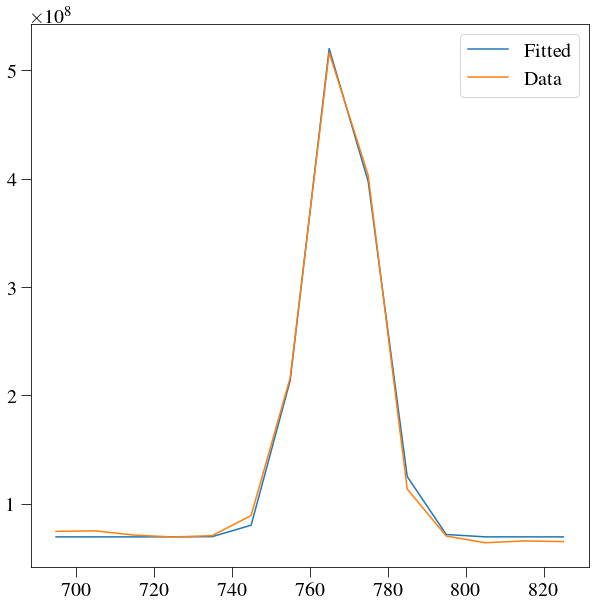

In [30]:
fname = 'PISCES_Files/det759.9.fits'
orig_760 = fits.getdata(fname)
cube = extract1D(orig_760,lam_midpts,new_calib)
plotfit(cube,lam_midpts)


In [27]:
int(-0.63)

0

In [10]:
from scipy import interpolate
def check_calib(image,
                lam,
                calib_file,
                ):
    '''
    '''
    
    # number of lenslets (hardcoded for now)
    nlens=108
    
    # load calibration file
    calib = fits.open(calib_file)
    
    # wavelength corresponding to each center pixel for each location along the spectral
    # direction
    lam_indx = calib[0].data
    
    # x & y pixel locations of each psflet for each wavelength
    # nominally this is evaluated at the center of the pixels across the dispersion
    # direction
    xindx = calib[1].data
    yindx = calib[2].data
    
    # array of number of wavelengths for each microspectrum
    # for example, towards the edges of the detector there will be less wavelengths
    # per microspectrum since some of them fall outside the detector 
    nlam = calib[3].data.astype(int)
    
    # Number of maximum wavelengths across the spectral dimension across the entire field
    Nmax = np.amax(nlam)

    # boolean mask for good vs bad psflets
    good = calib[4].data.astype(int)
    
    # standard deviation of the gaussian fits (same size as xindx and yindx)
    sig = calib[5].data
    
    # define arrays of indices to extract the data from the detector
    x = np.arange(image.shape[1])
    y = np.arange(image.shape[0])
    x, y = np.meshgrid(x, y)
    
    # allocate space for results
#     coefs = np.zeros(tuple([max(Nmax, len(lamlist))] + list(yindx.shape)[:-1]))
#     cube = np.zeros((len(lamlist), nlens, nlens))
#     xarr, yarr = np.meshgrid(np.arange(Nmax), np.arange(delt_y))
#     print xarr.shape,yarr.shape

    xpos = np.zeros((xindx.shape[0],xindx.shape[1]))
    ypos = np.zeros((yindx.shape[0],yindx.shape[1]))
    
    # This is the main loop over all lenslets
    for i in range(xindx.shape[0]):
        for j in range(yindx.shape[1]):
            # only do this for a good lenslet that hasn't been flagged
            if good[i, j]:
                # load the values for this microspectrum
                _x = xindx[i, j, :nlam[i, j]]
                _y = yindx[i, j, :nlam[i, j]]
                _lam = lam_indx[i, j, :nlam[i, j]]
                tck = interpolate.splrep(_lam, _x, s=0, k=3)
                xpos[i,j] = interpolate.splev(lam, tck, ext=1)
                ypos[i,j] = np.nanmean(_y)
                
                
                
    # It is possible that an extra flatfielding step will be wanted. If this is desired
    # in this function, then it would be:
    # cube *= flatfield
    # A similar expression would hold for further masking or smoothing or whatever.
    # Of course, a flatfield and/or a mask would need to be supplied to the function.
    
    return xpos,ypos

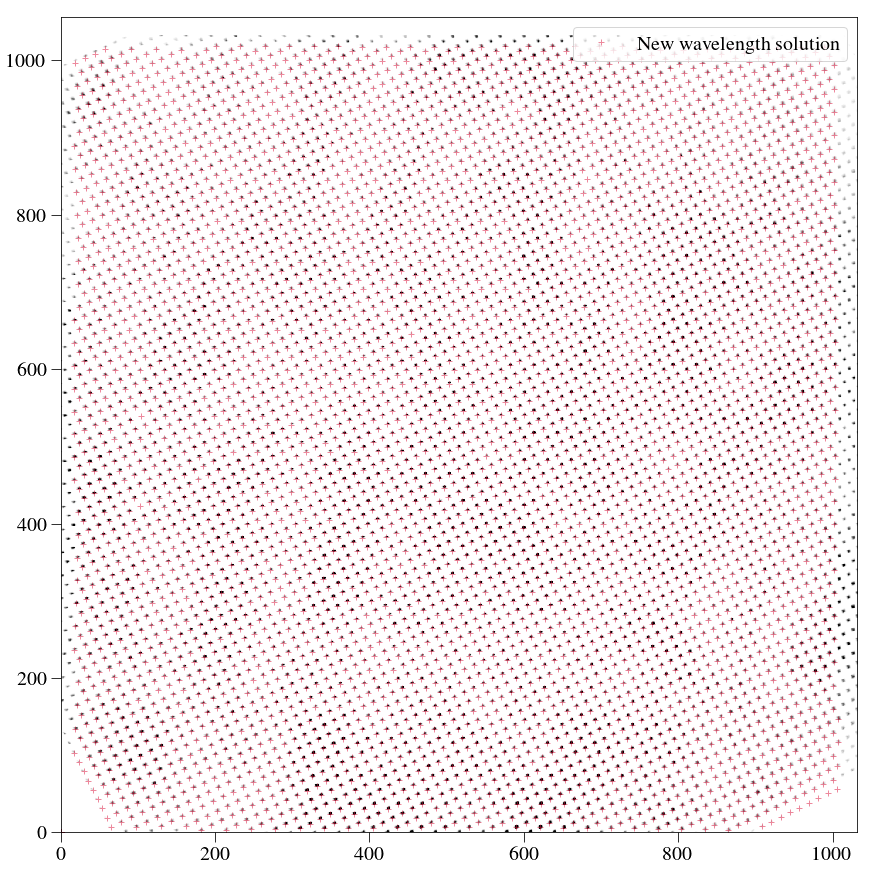

In [11]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(15, 15))
image = fits.getdata(fname)
# start by displaying grayscale image in the background
mean = np.mean(image)
std = np.std(image)
norm = mpl.colors.Normalize(vmin=mean, vmax=mean + 5 * std)
ax.imshow(
    image,
    cmap='Greys',
    norm=norm,
    interpolation='nearest',
    origin='lower')

xpos,ypos = check_calib(image,
                760.,
                new_calib,
                )
marker='+'
plt.plot(xpos.flatten(),ypos.flatten(),marker=marker,linestyle='None',color='crimson',alpha=0.5, label='New wavelength solution')
plt.xlim([0,image.shape[0]])
plt.ylim([0,image.shape[1]])
plt.legend(fontsize=20)
outdir='Out/'
fig.savefig(outdir+'test.pdf', dpi=100)

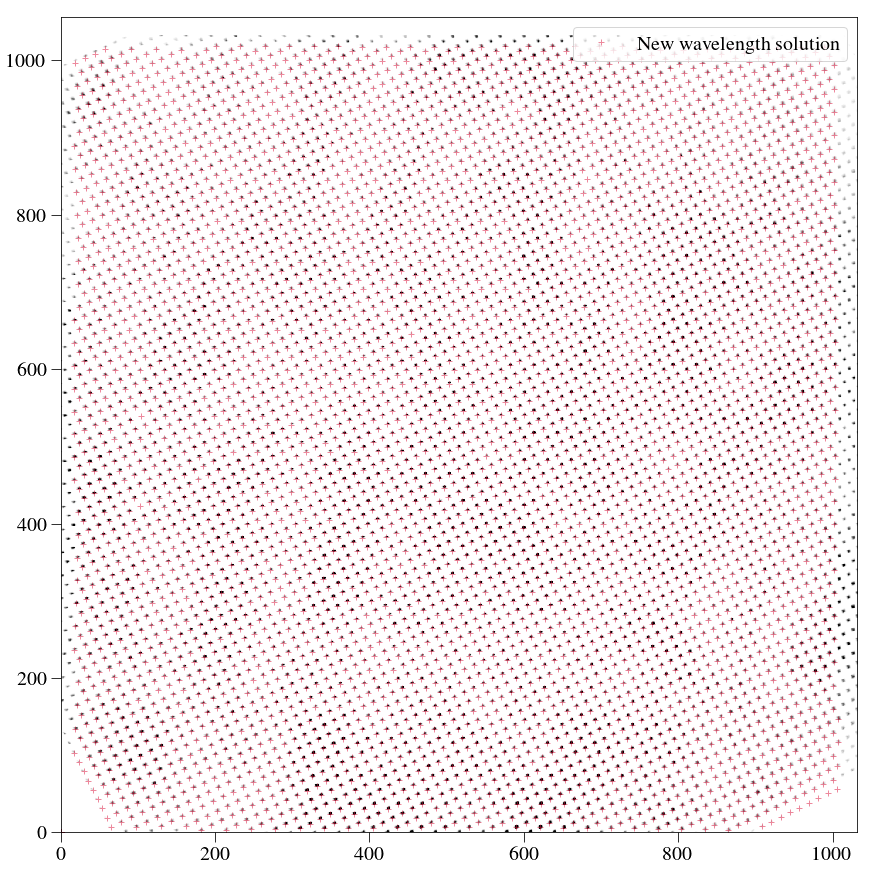

In [10]:
from unittests import check_calib as cc
cc(fname,
  760.,
  new_calib,
  'Out/')

(5, 28) (5, 28)
760.6275994353298
[[ 695.         2908.82301354]
 [ 705.         2878.4836088 ]
 [ 715.         2842.40554314]
 [ 725.         2819.3784879 ]
 [ 735.         2832.70675786]
 [ 745.         2996.41754528]
 [ 755.         3629.65636532]
 [ 765.         3754.60212191]
 [ 775.         2904.3122745 ]
 [ 785.         2761.09038032]
 [ 795.         2700.09891659]
 [ 805.         2642.83548999]
 [ 815.         2678.55882256]
 [ 825.         2649.15800329]]


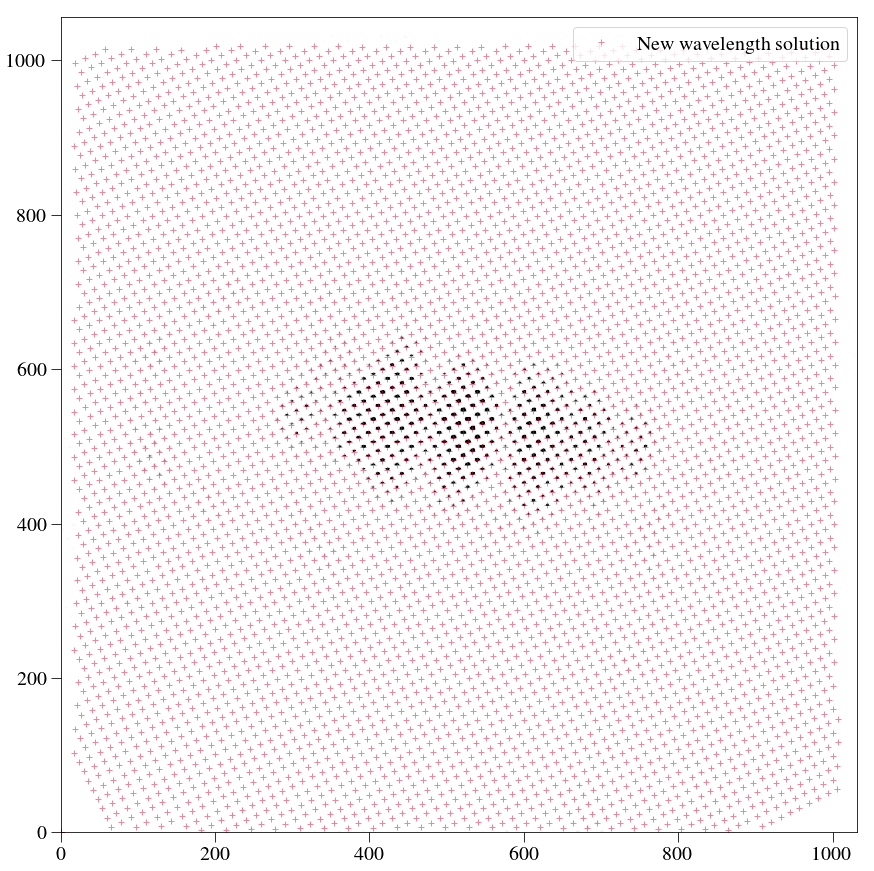

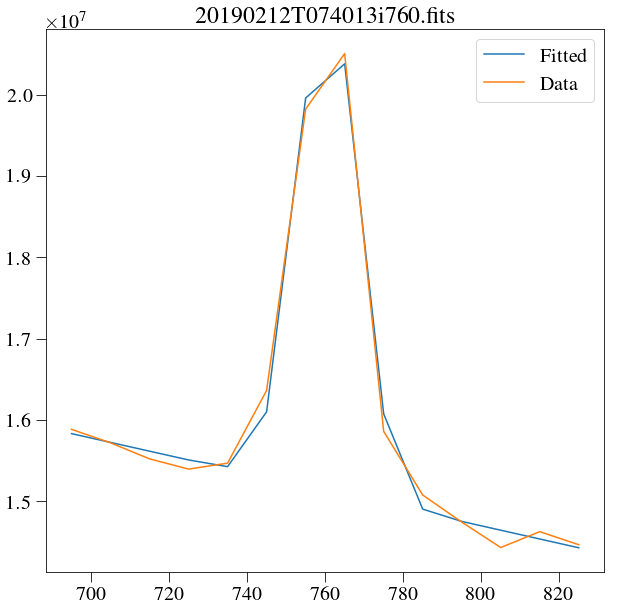

In [17]:
fname = 'Out/20190212T074013i760.fits'
cc(fname,
  760.,
  new_calib,
  'Out/',
  '20190212T074013i760')
img = fits.getdata(fname)
cube = extract1D(img,lam_midpts,new_calib)
plotfit(cube,lam_midpts)
plt.title('20190212T074013i760.fits')
plt.savefig('Out/20190212T074013i760_plot.pdf',dpi=300)
print(np.array([lam_midpts,np.nanmean(cube,axis=(1,2))]).T)


(5, 28) (5, 28)
760.7110221636037
[[ 695.         2907.70140833]
 [ 705.         2877.92694912]
 [ 715.         2841.59138817]
 [ 725.         2818.38646342]
 [ 735.         2828.69709318]
 [ 745.         2966.09439885]
 [ 755.         3507.7297298 ]
 [ 765.         3624.85590179]
 [ 775.         2883.57266159]
 [ 785.         2759.47289612]
 [ 795.         2699.27662115]
 [ 805.         2642.23755343]
 [ 815.         2678.04815274]
 [ 825.         2648.42761751]]
[[ 695.         2907.70140833]
 [ 705.         2877.92694912]
 [ 715.         2841.59138817]
 [ 725.         2818.38646342]
 [ 735.         2828.69709318]
 [ 745.         2966.09439885]
 [ 755.         3507.7297298 ]
 [ 765.         3624.85590179]
 [ 775.         2883.57266159]
 [ 785.         2759.47289612]
 [ 795.         2699.27662115]
 [ 805.         2642.23755343]
 [ 815.         2678.04815274]
 [ 825.         2648.42761751]]


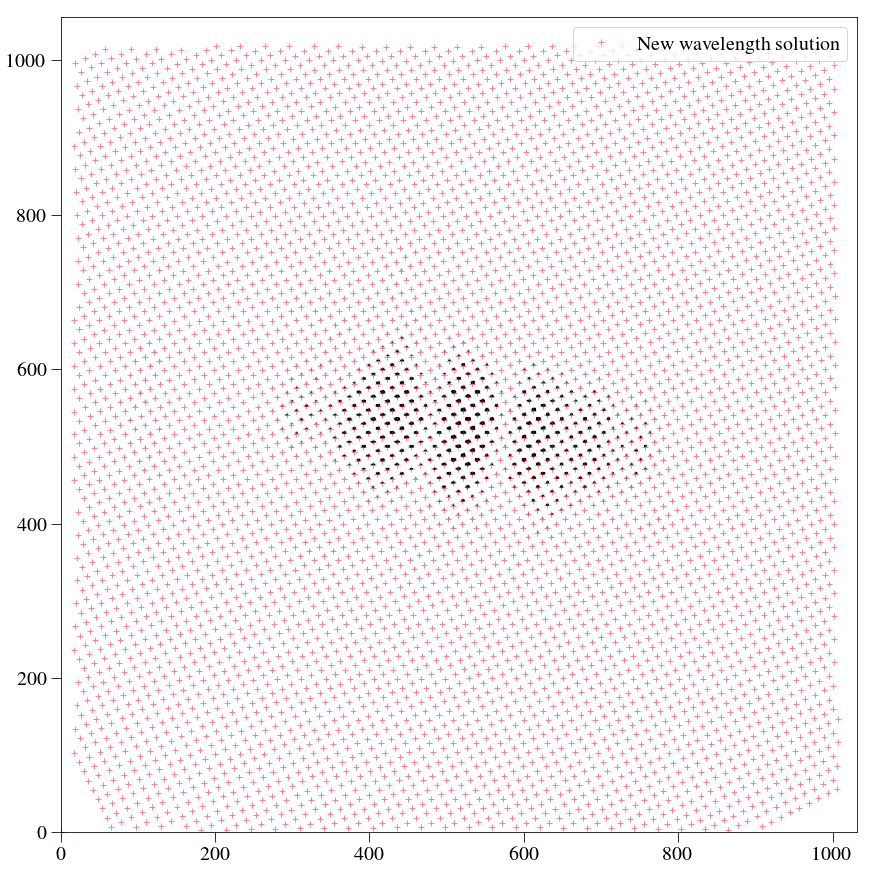

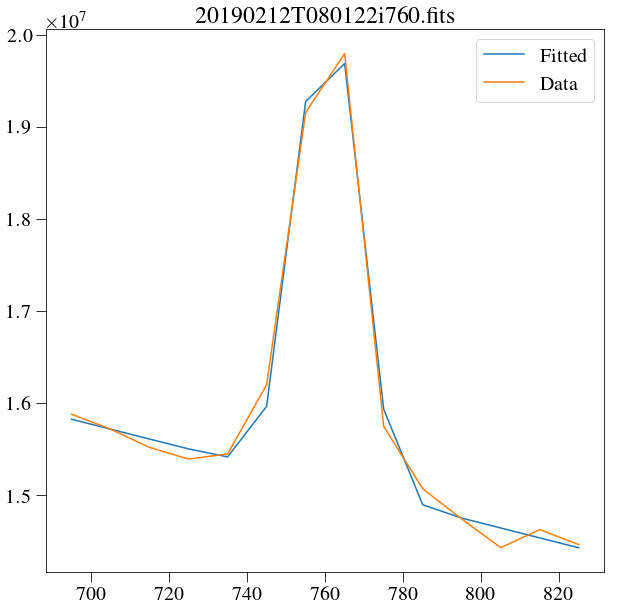

In [18]:
fname = 'Out/20190212T080122i760.fits'
cc(fname,
  760.,
  new_calib,
  'Out/',
  '20190212T080122i760')
img = fits.getdata(fname)
cube = extract1D(img,lam_midpts,new_calib)
plotfit(cube,lam_midpts)
print(np.array([lam_midpts,np.nanmean(cube,axis=(1,2))]).T)
plt.title('20190212T080122i760.fits')
plt.savefig('Out/20190212T080122i760_plot.pdf',dpi=300)
print(np.array([lam_midpts,np.nanmean(cube,axis=(1,2))]).T)


In [19]:
fits.writeto('Out/PSF.fits',cube,overwrite=True)